In [145]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

## Simple CNN for Edgelovers

In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a.) Generation of the Data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [146]:
def make_image(vertical):
    image = np.zeros((50, 50, 1))
    for _ in range(10):
        if vertical:
            x_location = np.random.randint(0, 40 + 1)
            y_location = np.random.randint(0, 50)
            image[x_location: x_location + 10, y_location, :] = 1
        else:
            x_location = np.random.randint(0, 50)
            y_location = np.random.randint(0, 40 + 1)
            image[x_location, y_location: y_location + 10, :] = 1
    return image

In [147]:
x_train = np.zeros((1000, 50, 50, 1))
x_test = np.zeros((1000, 50, 50, 1))

y_train = np.zeros((1000, 2))
y_test = np.zeros((1000, 2))

for i in range(1000):
    type_flag = bool(np.random.randint(0, 2))
    x_train[i, :, :, :] = make_image(type_flag)
    if type_flag:
        y_train[i, 0] = 1
    else:
        y_train[i, 1] = 1

for i in range(1000):
    type_flag = bool(np.random.randint(0, 2))
    x_test[i, :, :, :] = make_image(type_flag)
    if type_flag:
        y_test[i, 0] = 1
    else:
        y_test[i, 1] = 1

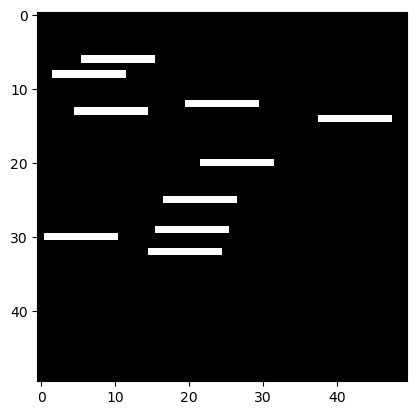

In [148]:
plt.imshow(x_train[1, :, :, :], cmap="gray")

### b.) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have no more than 30 trainable parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [149]:
model = keras.Sequential([
    keras.Input((50, 50, 1)),
    keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding="valid", activation="relu", name="convolution_1"),
    keras.layers.MaxPool2D(padding="valid", name="pooling_1"),
    keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding="valid", activation="relu", name="convolution_2"),
    keras.layers.MaxPool2D(padding="valid", name="pooling_2"),
    keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding="valid", activation="relu", name="convolution_3"),
    keras.layers.MaxPool2D(padding="valid", name="pooling_3"),
    keras.layers.Conv2D(filters=1, kernel_size=(2, 2), activation="relu", name="convolution_4"),
    keras.layers.MaxPool2D(padding="valid", name="pooling_4"),
    keras.layers.Flatten(name="flatten"),
    keras.layers.Dense(2, activation="sigmoid", name="output_neuron")
], name="EdgeDetector")

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model.summary()

Model: "EdgeDetector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 49, 49, 1)         5         
                                                                 
 pooling_1 (MaxPooling2D)    (None, 24, 24, 1)         0         
                                                                 
 convolution_2 (Conv2D)      (None, 23, 23, 1)         5         
                                                                 
 pooling_2 (MaxPooling2D)    (None, 11, 11, 1)         0         
                                                                 
 convolution_3 (Conv2D)      (None, 10, 10, 1)         5         
                                                                 
 pooling_3 (MaxPooling2D)    (None, 5, 5, 1)           0         
                                                                 
 convolution_4 (Conv2D)      (None, 4, 4, 1)          

In [150]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50,
          callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
32/32 [==============================] - 3s 35ms/step - loss: 0.6902 - accuracy: 0.5760 - val_loss: 0.6885 - val_accuracy: 0.6570
Epoch 2/50
32/32 [==============================] - 0s 15ms/step - loss: 0.6878 - accuracy: 0.6470 - val_loss: 0.6853 - val_accuracy: 0.6650
Epoch 3/50
32/32 [==============================] - 1s 45ms/step - loss: 0.6845 - accuracy: 0.6490 - val_loss: 0.6808 - val_accuracy: 0.6670
Epoch 4/50
32/32 [==============================] - 0s 15ms/step - loss: 0.6796 - accuracy: 0.6730 - val_loss: 0.6743 - val_accuracy: 0.6730
Epoch 5/50
32/32 [==============================] - 0s 13ms/step - loss: 0.6734 - accuracy: 0.6690 - val_loss: 0.6660 - val_accuracy: 0.6920
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.6655 - accuracy: 0.6750 - val_loss: 0.6557 - val_accuracy: 0.6880
Epoch 7/50
32/32 [==============================] - 0s 12ms/step - loss: 0.6552 - accuracy: 0.6790 - val_loss: 0.6437 - val_accuracy: 0.6850
Epoch 8/50
32

In [151]:
history = model.history.history

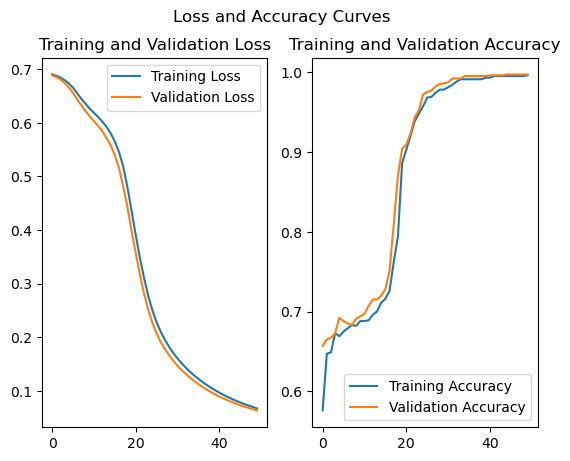

In [152]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(history["loss"], label = "Training Loss")
axs[0].plot(history["val_loss"], label = "Validation Loss")
axs[0].legend()
axs[0].set_title("Training and Validation Loss")

axs[1].plot(history["accuracy"], label = "Training Accuracy")
axs[1].plot(history["val_accuracy"], label = "Validation Accuracy")
axs[1].legend()
axs[1].set_title("Training and Validation Accuracy")

fig.suptitle("Loss and Accuracy Curves")

plt.show()

# Training und Validation Performance sind nahezu identisch ¯\_(ツ)_/¯

### c.) Visualize the learned Kernel

Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?

In [154]:
weights = model.get_weights()
kernels = []
for idx, weight in enumerate(weights):
    if idx % 2 == 0:
        kernels.append(weight)

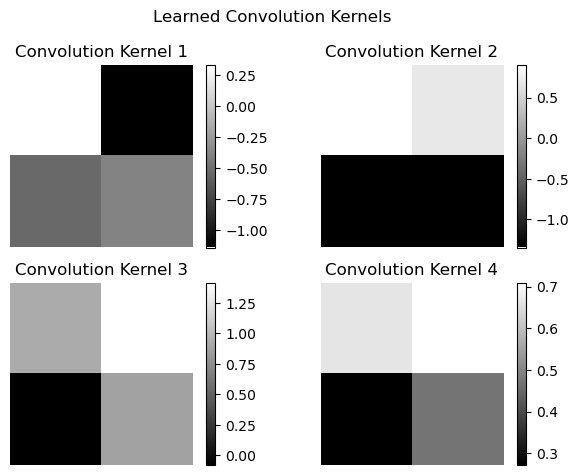

In [169]:
fig, axs = plt.subplots(2, 2)

for idx, ax in enumerate(axs.flatten()):
    im = ax.imshow(np.reshape(kernels[idx], (2, 2)), cmap="gray")
    ax.set_title(f"Convolution Kernel {idx + 1}")

    ax.axis("off")
    plt.colorbar(im, ax=ax)
fig.suptitle("Learned Convolution Kernels")
fig.tight_layout()
plt.show()